### **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

### **Load Dataset**

In [2]:
df = pd.read_csv('fashion_products.csv')
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


### **Data Understanding**

In [3]:
print("Jumlah kolom:", df.shape[1])
print("Jumlah baris:", df.shape[0])

Jumlah kolom: 9
Jumlah baris: 1000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [5]:
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


In [6]:
df.isnull().sum()

,0
User ID,0
Product ID,0
Product Name,0
Brand,0
Category,0
Price,0
Rating,0
Color,0
Size,0


In [7]:
df.duplicated().sum()

np.int64(0)

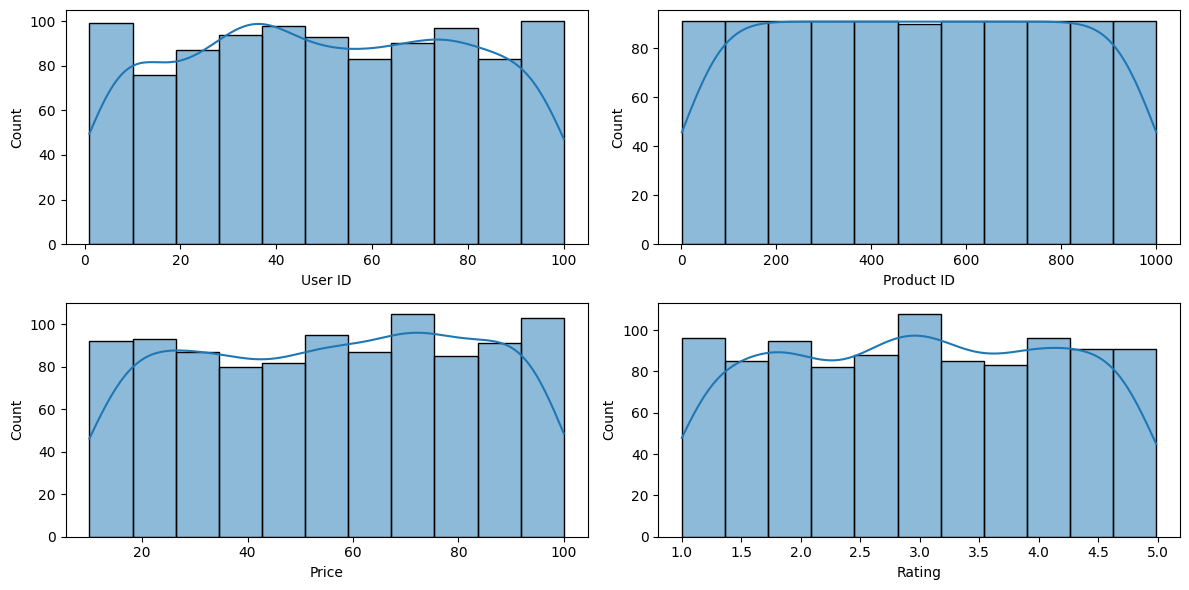

In [8]:
# Distribusi antar numerik
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='User ID', kde=True, ax=plt.subplot(2, 2, 1))
sns.histplot(data=df, x='Product ID', kde=True, ax=plt.subplot(2, 2, 2))
sns.histplot(data=df, x='Price', kde=True, ax=plt.subplot(2, 2, 3))
sns.histplot(data=df, x='Rating', kde=True, ax=plt.subplot(2, 2, 4))
plt.tight_layout()
plt.show()

<ipython-input-9-0a745a76ed74>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order = df[col].value_counts().index, palette='viridis')
<ipython-input-9-0a745a76ed74>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order = df[col].value_counts().index, palette='viridis')
<ipython-input-9-0a745a76ed74>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order = df[col].value_counts().index, palette='viridis')
<ipython-input-9-0a745a76ed74>:6: FutureWarning: 

Passing `palette` without assig

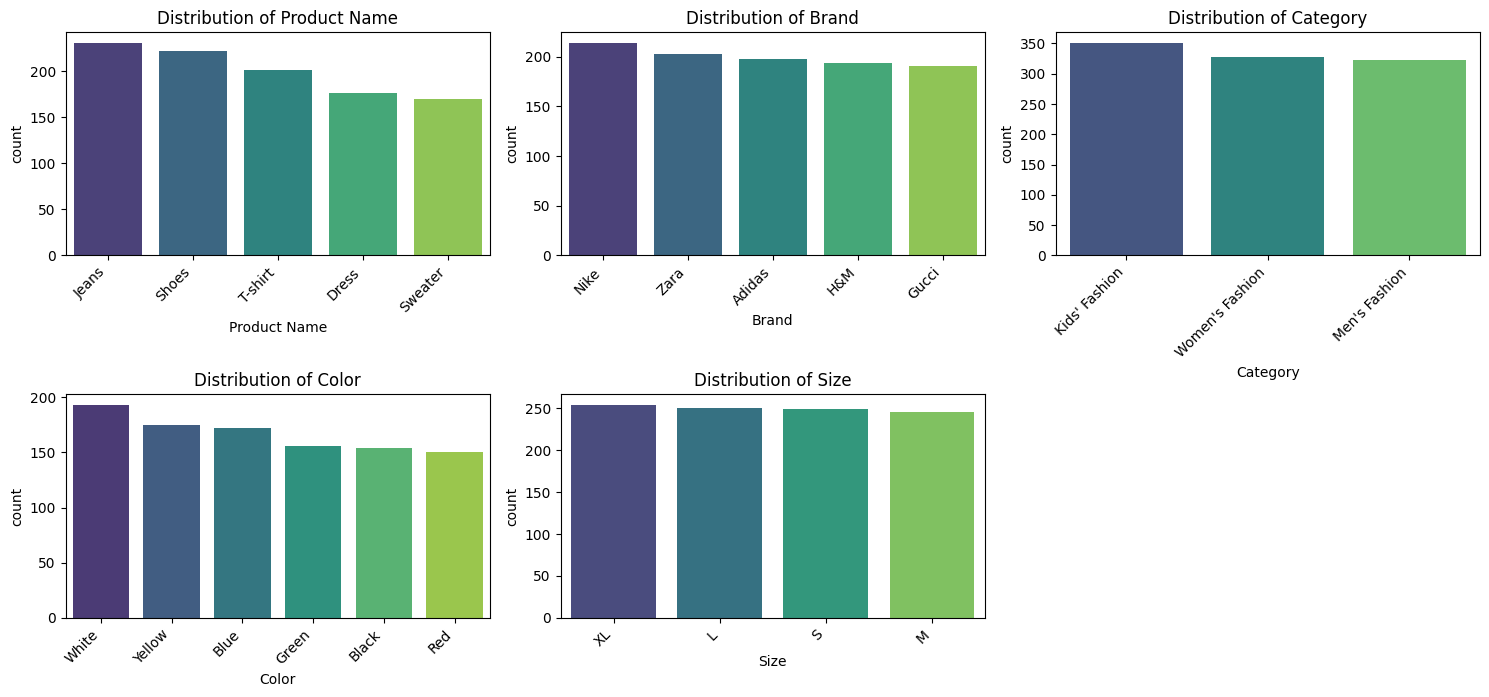

In [9]:
# Distribusi antar kategorik
categorical_cols = ['Product Name', 'Brand', 'Category', 'Color', 'Size']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
  plt.subplot(3, 3, i+1)
  sns.countplot(data=df, x=col, order = df[col].value_counts().index, palette='viridis')
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

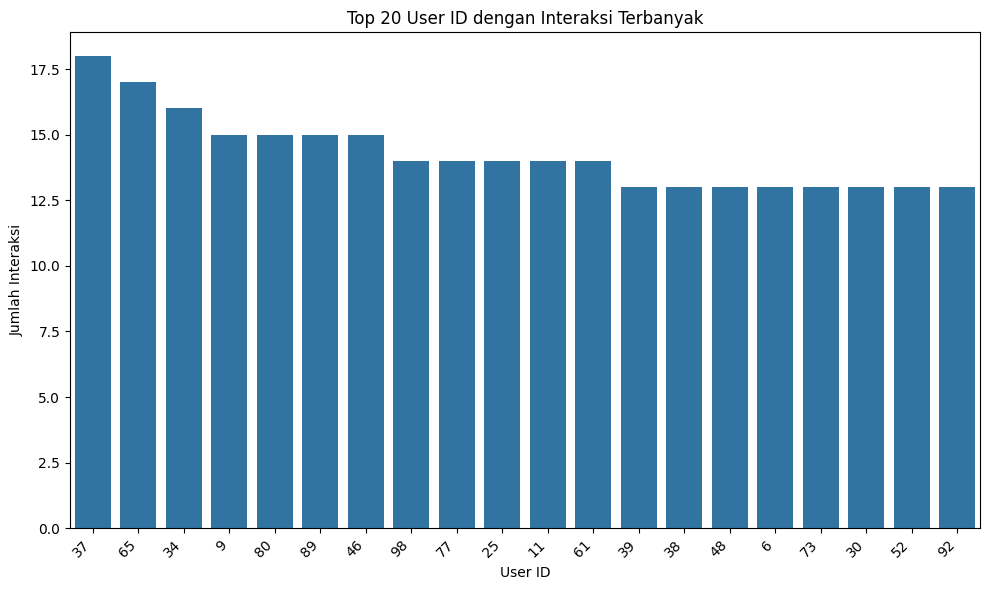

In [10]:
# Distribusi untuk user ID yang memiliki interaksi atau memberikan rating paling banyak

top_users = df['User ID'].value_counts().nlargest(20).index

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['User ID'].isin(top_users)], x='User ID', order=top_users)
plt.title('Top 20 User ID dengan Interaksi Terbanyak')
plt.xlabel('User ID')
plt.ylabel('Jumlah Interaksi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-11-8c032e18939f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Product ID', y='Average Rating', palette='Blues_r')


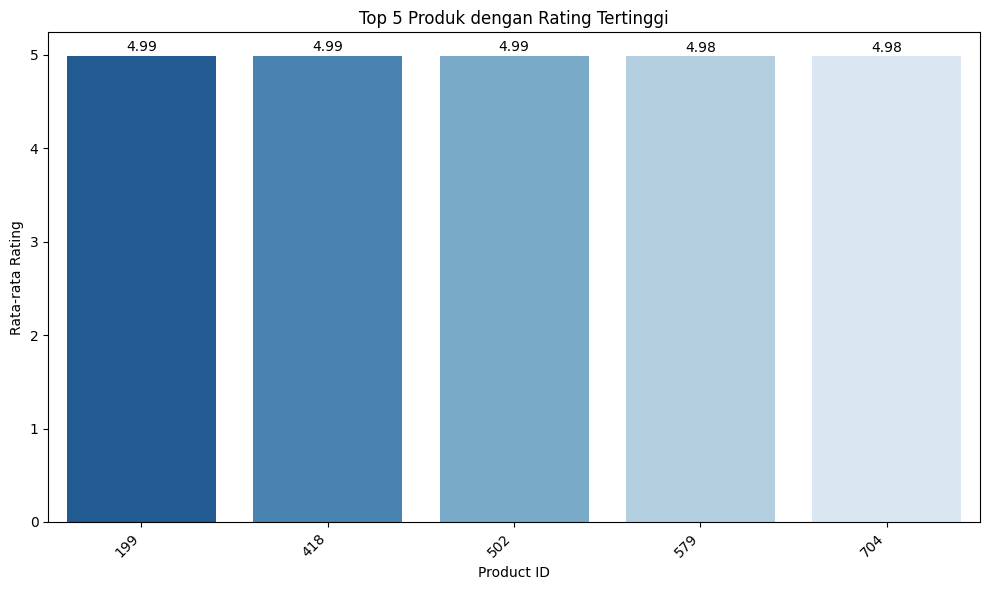

In [11]:
# Menghitung rata-rata rating product
rating_per_product = df.groupby('Product ID')['Rating'].agg(['mean', 'count']).reset_index()
rating_per_product.columns = ['Product ID', 'Average Rating', 'Rating Count']
rating_per_product = rating_per_product.sort_values(by='Average Rating', ascending=False)

top_products = rating_per_product.head()

# Menampilkan 5 produk dengan rating tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Product ID', y='Average Rating', palette='Blues_r')
plt.title('Top 5 Produk dengan Rating Tertinggi')
plt.xlabel('Product ID')
plt.ylabel('Rata-rata Rating')
for i, v in enumerate(top_products['Average Rating']):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-12-590a9fa5ff4e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_rated_products, x='Product ID', y='Average Rating', palette='Reds_r')


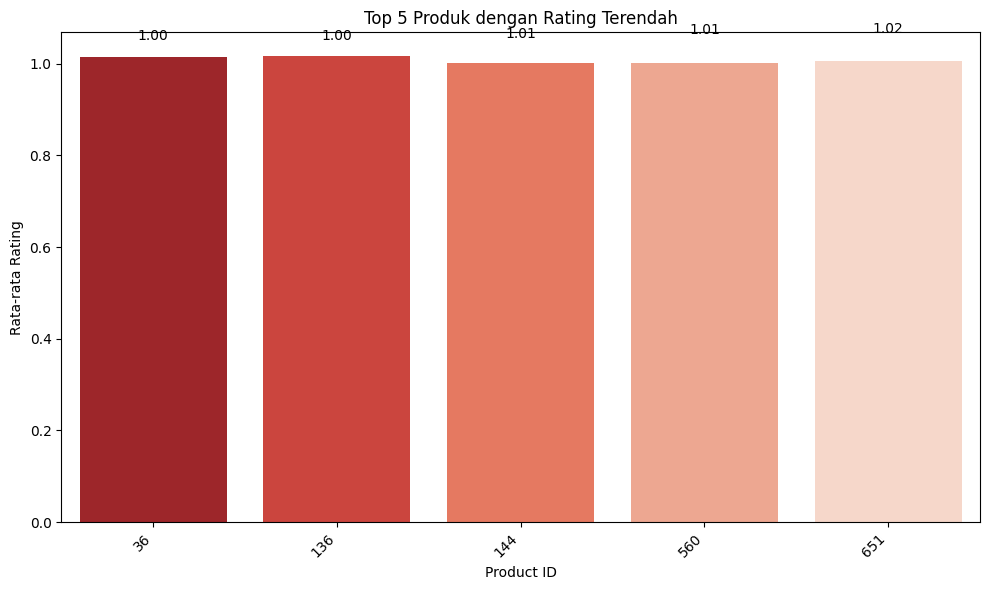

In [12]:
# Menampilkan 5 produk dengan rating terendah
lowest_rated_products = rating_per_product.sort_values(by='Average Rating', ascending=True).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=lowest_rated_products, x='Product ID', y='Average Rating', palette='Reds_r')
plt.title('Top 5 Produk dengan Rating Terendah')
plt.xlabel('Product ID')
plt.ylabel('Rata-rata Rating')
for i, v in enumerate(lowest_rated_products['Average Rating']):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

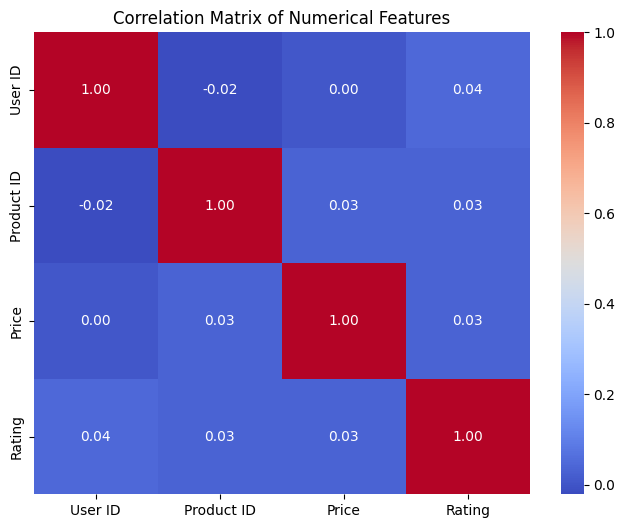

In [13]:
# Korelasi antar fitur numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **Data Preparation**

In [14]:
# Memindahkan Dress dari Men's Fashion ke Women's Fashion
df.loc[(df['Product Name'] == 'Dress') & (df['Category'] == "Men's Fashion"), 'Category'] = "Women's Fashion"
print("Jumlah Dress di Men's Fashion setelah pembersihan:",
      len(df[(df['Product Name'] == 'Dress') & (df['Category'] == "Men's Fashion")]))

Jumlah Dress di Men's Fashion setelah pembersihan: 0


In [15]:
# Mengubah nilai pada kolom menjadi Category, Brand, Color, Size, dan Product Name huruf kecil
df['Category'] = df['Category'].str.lower()
df['Brand'] = df['Brand'].str.lower()
df['Color'] = df['Color'].str.lower()
df['Size'] = df['Size'].str.lower()
df['Product Name'] = df['Product Name'].str.lower()

In [16]:
# Menyeleksi atribut dengan memilih kolom yang relevan untuk CBF
features = ['Product Name', 'Category', 'Brand', 'Color', 'Size']
cbf_data = df[features].copy()

In [17]:
# Transformasi Data dengan One-Hot Encoding
categorical_features = ['Product Name', 'Category', 'Brand', 'Color', 'Size']
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(cbf_data[categorical_features])
encoded_columns = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_columns, index=cbf_data.index)

## **Modeling**

**Cosine Similarity**

In [18]:
# Menghitung Cosine Similarity
similarity_matrix = cosine_similarity(encoded_df)
similarity_df = pd.DataFrame(similarity_matrix, index=df['Product ID'], columns=df['Product ID'])
similarity_df.head()

Product ID,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
Product ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.4,0.8,0.0,0.4,0.6,0.2,0.2,0.2,0.2,...,0.0,0.4,0.2,0.0,0.2,0.4,0.0,0.0,0.2,0.4
2,0.4,1.0,0.2,0.2,0.2,0.4,0.0,0.0,0.2,0.0,...,0.4,0.4,0.6,0.4,0.0,0.6,0.2,0.2,0.2,0.6
3,0.8,0.2,1.0,0.0,0.2,0.8,0.2,0.2,0.2,0.2,...,0.0,0.2,0.4,0.0,0.2,0.2,0.0,0.0,0.2,0.4
4,0.0,0.2,0.0,1.0,0.2,0.0,0.4,0.2,0.2,0.4,...,0.2,0.0,0.4,0.2,0.2,0.4,0.0,0.6,0.4,0.4
5,0.4,0.2,0.2,0.2,1.0,0.2,0.2,0.0,0.2,0.2,...,0.0,0.6,0.0,0.2,0.2,0.4,0.0,0.2,0.2,0.2


In [19]:
# Fungsi Rekomendasi Consine Similarity
def get_recommendations_with_similarity(product_id, similarity_matrix, data, top_n=5):
    sim_scores = similarity_matrix.loc[product_id]
    sim_scores = sim_scores.sort_values(ascending=False)
    top_products = sim_scores.iloc[1:top_n+1].index
    recommendations = data[data['Product ID'].isin(top_products)][['Product ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size']]
    recommendations['Similarity Score'] = sim_scores[top_products].values
    return recommendations.sort_values(by='Similarity Score', ascending=False)

product_id = 65
recommendations = get_recommendations_with_similarity(product_id, similarity_df, df, top_n=5)
print(f"\nRekomendasi untuk Product ID {product_id} menggunakan Cosine Similarity:")
recommendations


Rekomendasi untuk Product ID 65 menggunakan Cosine Similarity:


,Product ID,Product Name,Brand,Category,Color,Size,Similarity Score
59,60,shoes,h&m,kids' fashion,yellow,xl,1.0
132,133,shoes,h&m,kids' fashion,blue,xl,1.0
446,447,shoes,h&m,kids' fashion,yellow,xl,0.8
492,493,shoes,h&m,kids' fashion,white,xl,0.8
917,918,shoes,h&m,kids' fashion,red,xl,0.8


**Euclidean Distance**

In [20]:
# Menghitung Euclidean Distance
distance_matrix = euclidean_distances(encoded_df)

# Mengonversi Euclidean Distance menjadi skor kemiripan
# Similarity = 1 / (1 + distance), sehingga nilai lebih kecil (jarak kecil) menghasilkan kemiripan lebih besar
similarity_matrix = 1 / (1 + distance_matrix)

# Membuat DataFrame untuk matriks kemiripan
similarity_df_euclidean = pd.DataFrame(similarity_matrix, index=df['Product ID'], columns=df['Product ID'])

# Menampilkan 5 baris pertama dari matriks kemiripan
print("\nMatriks Kemiripan (berbasis Euclidean Distance) - 5 baris pertama:")
similarity_df_euclidean.head()


Matriks Kemiripan (berbasis Euclidean Distance) - 5 baris pertama:


Product ID,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
Product ID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.289898,0.414214,0.240253,0.289898,0.333333,0.261204,0.261204,0.261204,0.261204,...,0.240253,0.289898,0.261204,0.240253,0.261204,0.289898,0.240253,0.240253,0.261204,0.289898
2,0.289898,1.000000,0.261204,0.261204,0.261204,0.289898,0.240253,0.240253,0.261204,0.240253,...,0.289898,0.289898,0.333333,0.289898,0.240253,0.333333,0.261204,0.261204,0.261204,0.333333
3,0.414214,0.261204,1.000000,0.240253,0.261204,0.414214,0.261204,0.261204,0.261204,0.261204,...,0.240253,0.261204,0.289898,0.240253,0.261204,0.261204,0.240253,0.240253,0.261204,0.289898
4,0.240253,0.261204,0.240253,1.000000,0.261204,0.240253,0.289898,0.261204,0.261204,0.289898,...,0.261204,0.240253,0.289898,0.261204,0.261204,0.289898,0.240253,0.333333,0.289898,0.289898
5,0.289898,0.261204,0.261204,0.261204,1.000000,0.261204,0.261204,0.240253,0.261204,0.261204,...,0.240253,0.333333,0.240253,0.261204,0.261204,0.289898,0.240253,0.261204,0.261204,0.261204


In [21]:
# Fungsi Rekomendasi Euclidean Distance
def get_recommendations_with_euclidean(product_id, similarity_matrix, data, top_n=5):

    # Mengambil skor kemiripan untuk product_id
    sim_scores = similarity_matrix.loc[product_id]

    # Mengurutkan skor kemiripan secara menurun
    sim_scores = sim_scores.sort_values(ascending=False)

    # Mengambil top_n produk paling mirip, kecuali produk itu sendiri
    top_products = sim_scores.iloc[1:top_n+1].index

    # Membuat DataFrame rekomendasi
    recommendations = data[data['Product ID'].isin(top_products)][['Product ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size']]
    recommendations['Similarity Score'] = sim_scores[top_products].values

    # Mengurutkan berdasarkan skor kemiripan
    return recommendations.sort_values(by='Similarity Score', ascending=False)

product_id = 65
recommendations_euclidean = get_recommendations_with_euclidean(product_id, similarity_df_euclidean, df, top_n=5)
print(f"\nRekomendasi untuk Product ID {product_id} menggunakan Euclidean Distance:")
recommendations_euclidean


Rekomendasi untuk Product ID 65 menggunakan Euclidean Distance:


,Product ID,Product Name,Brand,Category,Color,Size,Similarity Score
59,60,shoes,h&m,kids' fashion,yellow,xl,1.000000
132,133,shoes,h&m,kids' fashion,blue,xl,1.000000
446,447,shoes,h&m,kids' fashion,yellow,xl,0.414214
492,493,shoes,h&m,kids' fashion,white,xl,0.414214
917,918,shoes,h&m,kids' fashion,red,xl,0.414214


### **Evalution**

**Cosine Similarity**

In [22]:
def evaluate_cbf_recommendations(similarity_df, df, test_product_ids, k=5):

    results = []

    for product_id in test_product_ids:
        # Mendapatkan rekomendasi
        recommendations = get_recommendations_with_similarity(product_id, similarity_df, df, top_n=k)

        # Mendapatkan atribut produk input
        product_info = df[df['Product ID'] == product_id][['Product Name', 'Category', 'Color', 'Size']].iloc[0]
        input_product_name = product_info['Product Name']
        input_category = product_info['Category']
        input_color = product_info['Color']
        input_size = product_info['Size']

        # Menghitung Precision@5
        relevant_count = sum(
            (recommendations['Product Name'] == input_product_name) &
            (recommendations['Category'] == input_category)
        )
        precision = relevant_count / k

        # Menghitung NDCG@5
        relevance_scores = []
        for _, row in recommendations.iterrows():
            score = 0
            if row['Color'] == input_color:
                score += 1
            if row['Size'] == input_size:
                score += 1
            relevance_scores.append(score)

        dcg = sum(rel / np.log2(i + 2) for i, rel in enumerate(relevance_scores))
        sorted_relevance = sorted(relevance_scores, reverse=True)
        idcg = sum(rel / np.log2(i + 2) for i, rel in enumerate(sorted_relevance))
        ndcg = dcg / idcg if idcg > 0 else 0

        # Menyimpan hasil
        results.append({
            'Product ID': product_id,
            'Precision@5': precision,
            'NDCG@5': ndcg,
            'Recommendations': recommendations
        })

        # Menampilkan hasil
        print(f"\nEvaluasi untuk Product ID {product_id} ({input_product_name}, {input_category}, {input_color}, {input_size}):")
        print(recommendations)
        print(f"Precision@5: {precision:.3f}, NDCG@5: {ndcg:.3f}")

    return results

# Menjalankan Evaluasi
test_product_ids = [65]
results = evaluate_cbf_recommendations(similarity_df, df, test_product_ids, k=5)


Evaluasi untuk Product ID 65 (shoes, kids' fashion, yellow, xl):
     Product ID Product Name Brand       Category   Color Size  \
59           60        shoes   h&m  kids' fashion  yellow   xl   
132         133        shoes   h&m  kids' fashion    blue   xl   
446         447        shoes   h&m  kids' fashion  yellow   xl   
492         493        shoes   h&m  kids' fashion   white   xl   
917         918        shoes   h&m  kids' fashion     red   xl   

     Similarity Score  
59                1.0  
132               1.0  
446               0.8  
492               0.8  
917               0.8  
Precision@5: 1.000, NDCG@5: 0.971


**Euclidean Distance**

In [23]:
def evaluate_cbf_recommendations_euclidean(similarity_df, df, test_product_ids, k=5):
    results = []

    for product_id in test_product_ids:
        # Mendapatkan rekomendasi menggunakan fungsi Euclidean
        recommendations = get_recommendations_with_euclidean(product_id, similarity_df, df, top_n=k)

        # Mendapatkan atribut produk input
        product_info = df[df['Product ID'] == product_id][['Product Name', 'Category', 'Color', 'Size']].iloc[0]
        input_product_name = product_info['Product Name']
        input_category = product_info['Category']
        input_color = product_info['Color']
        input_size = product_info['Size']

        # Menghitung Precision@5
        relevant_count = sum(
            (recommendations['Product Name'] == input_product_name) &
            (recommendations['Category'] == input_category)
        )
        precision = relevant_count / k

        # Menghitung NDCG@5
        relevance_scores = []
        for _, row in recommendations.iterrows():
            score = 0
            if row['Color'] == input_color:
                score += 1
            if row['Size'] == input_size:
                score += 1
            relevance_scores.append(score)

        dcg = sum(rel / np.log2(i + 2) for i, rel in enumerate(relevance_scores))
        sorted_relevance = sorted(relevance_scores, reverse=True)
        idcg = sum(rel / np.log2(i + 2) for i, rel in enumerate(sorted_relevance))
        ndcg = dcg / idcg if idcg > 0 else 0

        # Menyimpan hasil
        results.append({
            'Product ID': product_id,
            'Precision@5': precision,
            'NDCG@5': ndcg,
            'Recommendations': recommendations
        })

        # Menampilkan hasil
        print(f"\nEvaluasi untuk Product ID {product_id} ({input_product_name}, {input_category}, {input_color}, {input_size}):")
        print(recommendations)
        print(f"Precision@5: {precision:.3f}, NDCG@5: {ndcg:.3f}")

    return results

# Menjalankan Evaluasi
test_product_ids = [65]
results = evaluate_cbf_recommendations_euclidean(similarity_df_euclidean, df, test_product_ids, k=5)


Evaluasi untuk Product ID 65 (shoes, kids' fashion, yellow, xl):
     Product ID Product Name Brand       Category   Color Size  \
59           60        shoes   h&m  kids' fashion  yellow   xl   
132         133        shoes   h&m  kids' fashion    blue   xl   
446         447        shoes   h&m  kids' fashion  yellow   xl   
492         493        shoes   h&m  kids' fashion   white   xl   
917         918        shoes   h&m  kids' fashion     red   xl   

     Similarity Score  
59           1.000000  
132          1.000000  
446          0.414214  
492          0.414214  
917          0.414214  
Precision@5: 1.000, NDCG@5: 0.971
